In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

dv001.ib.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/MICCAI-2023


In [2]:
import sys, os
import numpy as np
import pandas as pd

sys.path.append('..')
%aimport mre_pinn

sys.path.append('../../param_search')
%aimport param_search
ps = param_search

Using backend: pytorch



# MICCAI 2023 phantom experiment

In [3]:
%pwd

'/ocean/projects/asc170022p/mtragoza/mre-pinn/MICCAI-2023'

In [31]:
template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=bio170034p
#SBATCH --partition=BatComputer
#SBATCH --gres=gpu:1
#SBATCH --time=48:00:00
#SBATCH -o %J.stdout
#SBATCH -e %J.stderr
#SBATCH --mail-type=all

hostname
pwd
module load anaconda3
conda activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/MRE-PINN

python ../../../train.py \\
    --xarray_dir {xarray_dir} \\
    --example_id {example_id} \\
    --frequency {frequency} \\
    --noise_ratio {noise_ratio} \\
    --omega {omega} \\
    --polar_input {polar_input} \\
    --savgol_filter {savgol_filter} \\
    --pde_name {pde_name} \\
    --pde_warmup_iters 10000 \\
    --pde_step_iters 5000 \\
    --pde_step_factor 10 \\
    --pde_init_weight {pde_init_weight} \\
    --pde_loss_weight {pde_loss_weight} \\
    --a_loss_weight {a_loss_weight} \\
    --anatomical {anatomical} \\
    --n_iters {n_iters} \\
    --save_prefix {job_name}    
'''
name = 'train_{data_name}_{example_id}_{savgol_filter}_{pde_name}'

param_space = ps.ParamSpace(
    data_name='phantom',
    xarray_dir='../../../data/BIOQIC/phantom',
    example_id=[30, 40, 50, 60, 70, 80, 90, 100],
    frequency='auto',
    noise_ratio=0.0,
    omega=[60],
    polar_input=0,
    pde_name=['helmholtz', 'hetero'],
    savgol_filter=[0, 1],
    pde_init_weight=1e-12,
    pde_loss_weight=1e-10,
    a_loss_weight=[0],
    anatomical=True,
    n_iters=1,
)

len(param_space)

32

In [32]:
name.format(**list(param_space)[0])

'train_phantom_30_0_helmholtz'

In [33]:
%autoreload
expt_name = '2023-2-26_phantom_FEM'

#jobs = ps.submit(template, name, list(param_space), work_dir=expt_name, verbose=True)
#jobs.to_csv(f'{expt_name}.jobs')

jobs = pd.read_csv(f'{expt_name}.jobs')

100%|██████████| 32/32 [00:00<00:00, 140.78it/s]
[14691035, 14691036, 14691037, 14691038, 14691039, 14691040, 14691041, 14691042, 14691043, 14691044, 14691045, 14691046, 14691047, 14691048, 14691049, 14691050, 14691051, 14691052, 14691053, 14691054, 14691055, 14691056, 14691057, 14691058, 14691059, 14691060, 14691061, 14691062, 14691063, 14691064, 14691065, 14691066]


In [182]:
status_cols = ['job_name', 'job_state', 'node_id', 'runtime', 'stdout', 'stderr']
status = ps.status(jobs, parse=True)[status_cols]
status

,job_name,job_state,node_id,runtime,stdout,stderr
job_id,,,,,,
14691035,train_phantom_30_0_helmholtz,NaN,NaN,NaN,[714 rows x 4 columns],None
14691036,train_phantom_30_1_helmholtz,NaN,NaN,NaN,[714 rows x 4 columns],None
14691037,train_phantom_30_0_hetero,NaN,NaN,NaN,[714 rows x 4 columns],None
14691038,train_phantom_30_1_hetero,NaN,NaN,NaN,[714 rows x 4 columns],None
14691039,train_phantom_40_0_helmholtz,NaN,NaN,NaN,[714 rows x 4 columns],None
14691040,train_phantom_40_1_helmholtz,NaN,NaN,NaN,[714 rows x 4 columns],None
14691041,train_phantom_40_0_hetero,NaN,NaN,NaN,[714 rows x 4 columns],None
14691042,train_phantom_40_1_hetero,NaN,NaN,NaN,[714 rows x 4 columns],None
14691043,train_phantom_50_0_helmholtz,NaN,NaN,NaN,[714 rows x 4 columns],None


In [184]:
status['has_error'] = ~status.stderr.isnull()
status['python_error'] = status.stderr.astype(str).str.contains('python: command not found')

status.fillna('DONE').groupby(['job_state', 'has_error', 'python_error'])[['job_name']].count()

,,,job_name
job_state,has_error,python_error,
DONE,False,False,32


In [185]:
pinn_jobs = pd.read_csv(f'2022-2-7_phantom_anat2.jobs', index_col=0)
fem_jobs = pd.read_csv(f'2023-2-26_phantom_FEM.jobs', index_col=0)

param_cols = ['pde_name', 'example_id', 'omega', 'a_loss_weight', 'savgol_filter'] # experimental parameters
index_cols = ['variable_name', 'spatial_frequency_bin', 'spatial_region'] # metric identifiers
metric_cols = ['MSAV', 'PSD', 'MAV', 'R'] # metric values

pinn_metrics = ps.metrics(pinn_jobs)
pinn_metrics['savgol_filter'] = 0

pinn_metrics_sg = pinn_metrics.copy()
pinn_metrics_sg['savgol_filter'] = 1

pinn_metrics = pd.concat([pinn_metrics, pinn_metrics_sg])

fem_metrics = ps.metrics(fem_jobs)
fem_metrics.iteration *= 100000

In [186]:
param_cols = ['pde_name', 'example_id', 'omega', 'a_loss_weight', 'savgol_filter'] # experimental parameters
index_cols = ['variable_name', 'spatial_frequency_bin', 'spatial_region'] # metric identifiers
metric_cols = ['MSAV', 'PSD', 'MAV', 'R'] # metric values

def metric_map(tup):
    metric_name, var_name = tup
    new_col_name = f'{var_name}_{metric_name}'
    new_col_name = new_col_name.replace('diff_MSAV', 'pred_MSAE')
    new_col_name = new_col_name.replace('pde_diff_MSAV', 'PDE_MSAE')
    new_col_name = new_col_name.replace('diff_MAV', 'pred_MAD')
    return new_col_name

def format_metrics(metrics):
    metrics = metrics[metrics.iteration == 100e3]
    metrics = metrics.groupby(param_cols + index_cols, sort=False)[metric_cols].mean()
    metrics = metrics.unstack(level=[len(param_cols)])
    metrics.columns = [metric_map(t) for t in metrics.columns.to_flat_index()]
    return metrics

def replace_metrics(m1, m2, index1, index2, columns):
    m1 = m1.reset_index().set_index(index2)
    m2 = m2.reset_index().set_index(index2)
    m1[columns] = m2[columns]
    return m1.reset_index().set_index(index1)
    
pinn_metrics = format_metrics(pinn_metrics)
fem_metrics  = format_metrics(fem_metrics)

metrics = replace_metrics(
    pinn_metrics, fem_metrics,
    index1=param_cols + index_cols[1:],
    index2=['pde_name', 'example_id', 'savgol_filter'] + index_cols[1:],
    columns=[c for c in fem_metrics if c.startswith('fem')]
)
metrics

a_pred_MSAV  \
pde_name  example_id omega a_loss_weight savgol_filter spatial_frequency_bin spatial_region                  
helmholtz 30         60    0.0           0             all                   all             115092.447734   
                                                                             0                         NaN   
                                                                             1                         NaN   
                                                                             2                         NaN   
                                                                             3                         NaN   
...                                                                                                    ...   
hetero    100        120   100.0         1             6.0                   all                       NaN   
                                                       7.0                   all                       NaN   
                                                       8.0                   all                       NaN   
                                                       9.0                   all                       NaN   
                                                       10.0                  all                       NaN   

                                                                                              a_pred_MSAE  \
pde_name  example_id omega a_loss_weight savgol_filter spatial_frequency_bin spatial_region                 
helmholtz 30         60    0.0           0             all                   all             89374.462487   
                                                                             0                        NaN   
                                                                             1                        NaN   
                                                                             2                        NaN   
                                                                             3                        NaN   
...                                                                                                   ...   
hetero    100        120   100.0         1             6.0                   all                      NaN   
                                                       7.0                   all                      NaN   
                                                       8.0                   all                      NaN   
                                                       9.0                   all                      NaN   
                                                       10.0                  all                      NaN   

                                                                                               a_true_MSAV  \
pde_name  example_id omega a_loss_weight savgol_filter spatial_frequency_bin spatial_region                  
helmholtz 30         60    0.0           0             all                   all             131911.677112   
                                                                             0                         NaN   
                                                                             1                         NaN   
                                                                             2                         NaN   
                                                                             3                         NaN   
...                                                                                                    ...   
hetero    100        120   100.0         1             6.0                   all                       NaN   
                                                       7.0                   all                       NaN   
                                                       8.0                   all                       NaN   
                                    

<IPython.core.display.Javascript object>


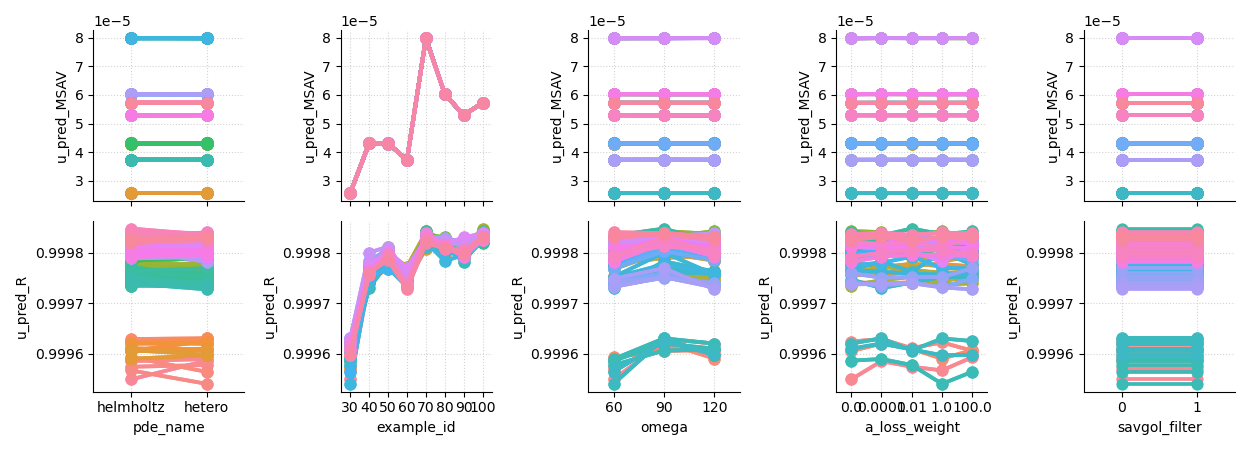

In [187]:
m = metrics.reset_index()

fig = ps.plot(
    m[(m.spatial_region == 'all') & (m.spatial_frequency_bin == 'all')].copy(),
    x=param_cols,
    y=['u_pred_MSAV', 'u_pred_R'],
    height=2.25,
    width=2.5,
    legend=False,
    tight=True
)

<IPython.core.display.Javascript object>


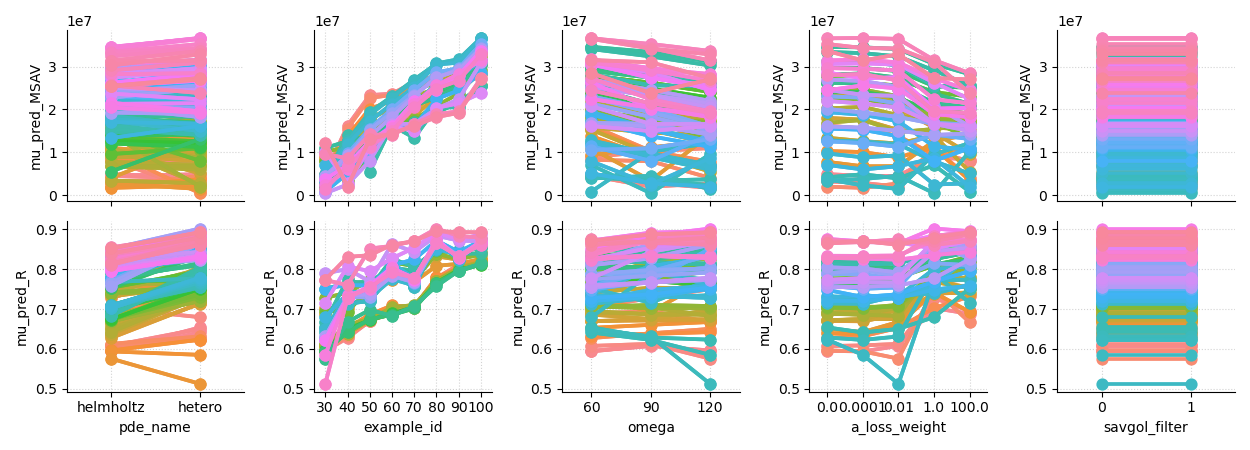

In [189]:
m = metrics.reset_index()

fig = ps.plot(
    m[(m.spatial_region == 'all') & (m.spatial_frequency_bin == 'all')].copy(),
    x=param_cols,
    y=['mu_pred_MSAV', 'mu_pred_R'],
    height=2.25,
    width=2.5,
    legend=False,
    tight=True
)

In [190]:
m['method'] = 'PINN_' + m['pde_name']

direct_helmholtz_m = m[m.pde_name == 'helmholtz'].copy()
direct_helmholtz_m['method'] = 'direct_helmholtz'
for col in m.columns:
    if col.startswith('direct'):
        direct_helmholtz_m[col.replace('direct', 'mu')] = m[col]

fem_helmholtz_m = m[m.pde_name == 'helmholtz'].copy()
fem_helmholtz_m['method'] = 'FEM_helmholtz'
for col in m.columns:
    if col.startswith('fem'):
        fem_helmholtz_m[col.replace('fem', 'mu')] = m[col]
        
fem_hetero_m = m[m.pde_name == 'hetero'].copy()
fem_hetero_m['method'] = 'FEM_hetero'
for col in m.columns:
    if col.startswith('fem'):
        fem_hetero_m[col.replace('fem', 'mu')] = m[col]
        
mm = pd.concat([direct_helmholtz_m, fem_helmholtz_m, fem_hetero_m, m])

In [191]:
import matplotlib as mpl
pct_format = mpl.ticker.PercentFormatter()

mm['mu_pred_MSAE_relative'] = mm['mu_pred_MSAE'] / mm['mu_true_MSAV'] * 100
mm['mu_pred_MAD_relative'] = mm['mu_pred_MAD'] / mm['mu_true_MAV'] * 100
mm['mu_pred_PSD_relative'] = mm['mu_diff_PSD'] / mm['mu_true_PSD'] * 100

In [192]:
%autoreload
import seaborn as sns
import matplotlib.pyplot as plt

colors = ps.results.get_color_palette(10, type='deep', min_val=0)
blue, orange, green, red, purple, brown, pink, gray, yellow, cyan = colors

colors = [red, yellow, green, cyan, blue]
sns.set_palette(colors)
colors = sns.color_palette()
colors

[(0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]

In [193]:
%pwd

'/ocean/projects/asc170022p/mtragoza/mre-pinn/MICCAI-2023'

<IPython.core.display.Javascript object>


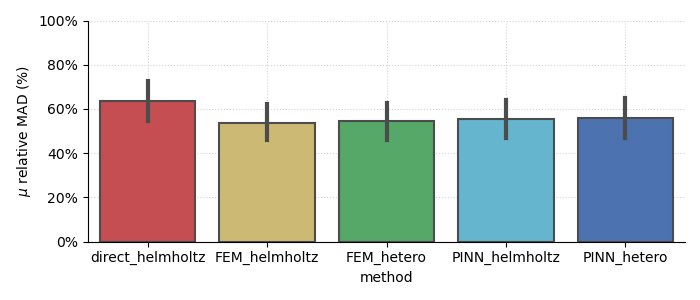

In [194]:
fig = ps.plot(
    mm[
        (mm.spatial_region != 'all') &
        (mm.spatial_region != '0') &
        ~mm.savgol_filter &
        (mm.omega == 90) &
        (mm.a_loss_weight == 1e0)
    ].copy(), 
    x='method',
    hue='method',
    y='mu_pred_MAD_relative',
    height=3,
    width=7,
    legend=False,
    tight=True,
    plot_func=ps.results.barplot
)
fig.axes[0].set_ylabel('$\mu$ relative MAD (%)')
fig.axes[0].set_ylim(0, 100)
fig.axes[0].yaxis.set_major_formatter(pct_format)
fig.tight_layout()

for i, patch in enumerate(fig.axes[0].patches):
    plt.setp(patch, facecolor=colors[i])

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_method_bar_plot.{ext}', bbox_inches='tight', dpi=200)

<IPython.core.display.Javascript object>


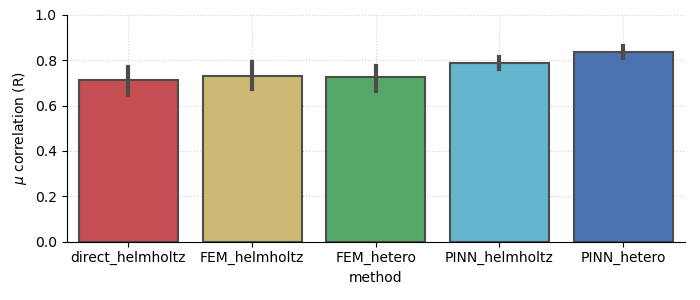

In [195]:
fig = ps.plot(
    mm[
        (mm.spatial_region == 'all') &
        (mm.spatial_frequency_bin == 'all') &
        ~mm.savgol_filter &
        (mm.omega == 90) &
        (mm.a_loss_weight == 1e0)
    ].copy(),
    x='method',
    hue='method',
    y='mu_pred_R',
    height=3,
    width=7,
    legend=False,
    tight=True,
    plot_func=ps.results.barplot
)
fig.axes[0].set_ylabel('$\mu$ correlation (R)')
fig.axes[0].set_ylim([0, 1])

for i, patch in enumerate(fig.axes[0].patches):
    plt.setp(patch, facecolor=colors[i])

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_method_R_bar_plot.{ext}', bbox_inches='tight', dpi=200)

<IPython.core.display.Javascript object>


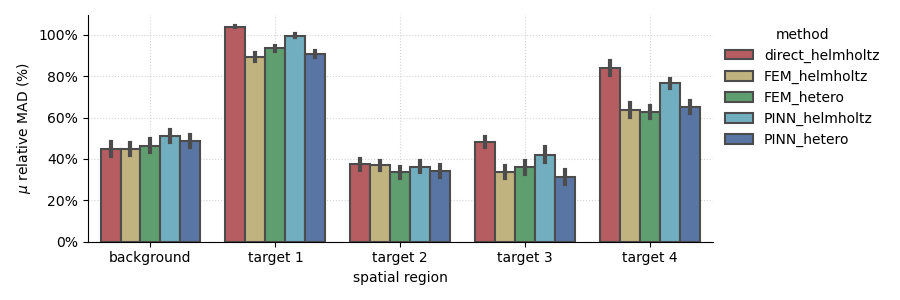

In [196]:
fig = ps.plot(
    mm[(mm.spatial_region != 'all') & (mm.spatial_region != '0') & ~mm.savgol_filter],
    x='spatial_region',
    y='mu_pred_MAD_relative',
    hue='method',
    height=3,
    width=9,
    legend=True,
    tight=True,
    plot_func=ps.results.barplot
)
fig.axes[0].set_ylabel('$\mu$ relative MAD (%)')
fig.axes[0].yaxis.set_major_formatter(pct_format)
fig.tight_layout()

fig.axes[0].set_xlabel('spatial region')
fig.axes[0].set_xticklabels(['background', 'target 1', 'target 2', 'target 3', 'target 4'])

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_region_bar_plot.{ext}', bbox_inches='tight', dpi=200)

In [197]:
mm[['omega', 'spatial_frequency_bin', 'mu_pred_PSD']]

,omega,spatial_frequency_bin,mu_pred_PSD
0,60,all,NaN
1,60,all,NaN
2,60,all,NaN
3,60,all,NaN
4,60,all,NaN
...,...,...,...
8155,120,6.0,1.675845e+06
8156,120,7.0,8.945154e+05
8157,120,8.0,5.633286e+05
8158,120,9.0,3.777524e+05


<IPython.core.display.Javascript object>


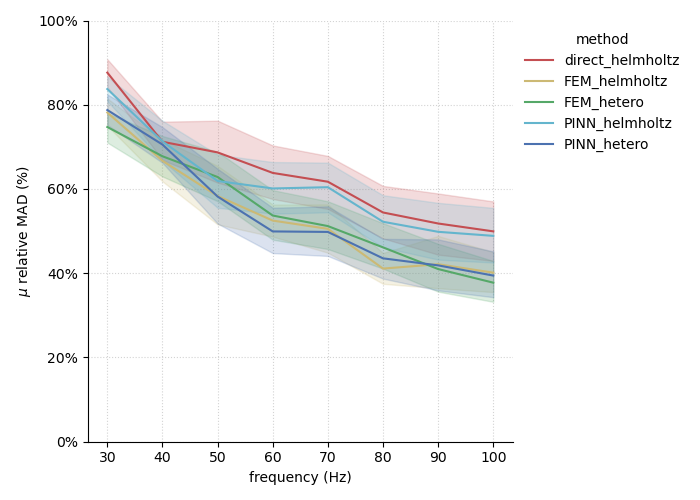

In [198]:
fig = ps.plot(
    mm[~mm.spatial_region.isin({'0', 'all'}) & ~mm.savgol_filter],
    x='example_id',
    y='mu_pred_MAD_relative',
    hue='method',
    height=5,
    width=7,
    legend=True,
    tight=True,
    plot_func=sns.lineplot
)
fig.axes[0].set_ylabel('$\mu$ relative MAD (%)')
fig.axes[0].yaxis.set_major_formatter(pct_format)
fig.axes[0].set_ylim(0, 100)
fig.tight_layout()

fig.axes[0].set_xlabel('frequency (Hz)')

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_frequency_line_plot.{ext}', bbox_inches='tight', dpi=200)

In [199]:
mm.omega.unique()

array([ 60,  90, 120])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmm['spatial_frequency_bin'] = mmm['spatial_frequency_bin'].astype(float).astype(int)



<IPython.core.display.Javascript object>


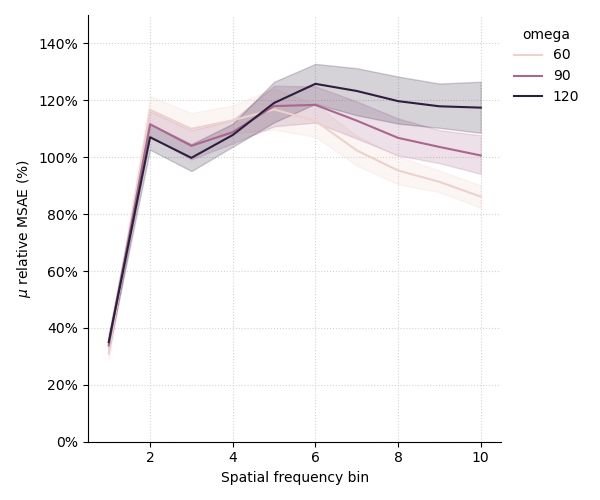

In [200]:
mmm = mm[~mm.spatial_frequency_bin.isin({'all'}) & mm.method.str.startswith('PINN')]
mmm['spatial_frequency_bin'] = mmm['spatial_frequency_bin'].astype(float).astype(int)

fig = ps.plot(
    mmm, 
    x='spatial_frequency_bin',
    y='mu_pred_PSD_relative',
    hue='omega',
    height=5,
    width=6,
    legend=True,
    tight=True,
    plot_func=sns.lineplot
)
fig.axes[0].set_xlabel('Spatial frequency bin')
fig.axes[0].set_ylabel('$\mu$ relative MSAE (%)')
fig.axes[0].yaxis.set_major_formatter(pct_format)
fig.axes[0].set_ylim(0, 150)
fig.axes[0].set_xlim(0.5, 10.5)
fig.tight_layout()

#fig.axes[0].set_xlabel('wave frequency (Hz)')

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_omega_line_plot.{ext}', bbox_inches='tight', dpi=200)

<IPython.core.display.Javascript object>


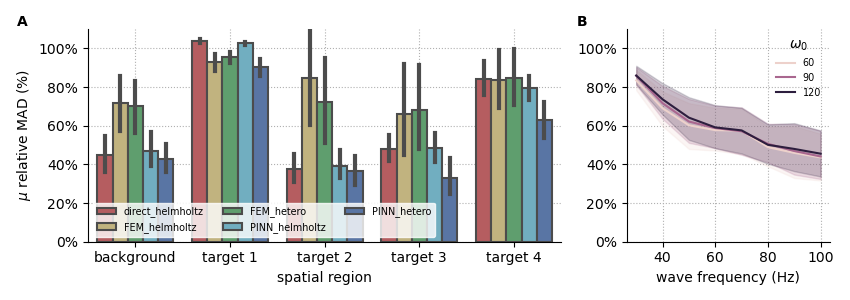

In [205]:
fig, ax = plt.subplots(1, 2, figsize=(8.5, 3), width_ratios=(0.7, 0.3), squeeze=False)

ps.results.barplot(
    mm[~mm.spatial_region.isin({'all', '0'}) & (mm.omega == 60) & (mm.a_loss_weight == 0)],
    x='spatial_region',
    y='mu_pred_MAD_relative',
    hue='method',
    ax=ax[0,0]
)
ax[0,0].grid(linestyle=':')
ax[0,0].axes.set_axisbelow(True)
ax[0,0].legend(frameon=True, fontsize='x-small', loc='lower left', ncol=3, edgecolor='w')

t = mpl.transforms.ScaledTranslation(-0.6, 0, fig.dpi_scale_trans)
ax[0,0].text(
    0, 1, 'A', fontweight='bold', va='bottom', ha='right',
    transform=ax[0,0].transAxes + t
)

ax[0,0].set_ylabel('$\mu$ relative MAD (%)')
ax[0,0].set_ylim(0, 110)
ax[0,0].yaxis.set_major_formatter(pct_format)

ax[0,0].set_xlabel('spatial region')
ax[0,0].set_xticklabels(['background', 'target 1', 'target 2', 'target 3', 'target 4'])

sns.lineplot(
    mm[~mm.spatial_region.isin({'all', '0'}) & mm.method.str.startswith('PINN') & (mm.a_loss_weight == 0)],
    x='example_id',
    y='mu_pred_MAD_relative',
    hue='omega',
    ax=ax[0,1]
)
ax[0,1].grid(linestyle=':')
ax[0,1].axes.set_axisbelow(True)
ax[0,1].legend(frameon=False, fontsize='x-small', title='$\omega_0$')

t = mpl.transforms.ScaledTranslation(-0.4, 0, fig.dpi_scale_trans)
ax[0,1].text(0, 1, 'B', fontweight='bold', va='bottom', ha='right', transform=ax[0,1].transAxes + t)

ax[0,1].set_ylabel(None)
ax[0,1].set_ylim(0, 110)
ax[0,1].yaxis.set_major_formatter(pct_format)

ax[0,1].set_xlabel('wave frequency (Hz)')

sns.despine(fig)
fig.tight_layout()

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_plots.{ext}', bbox_inches='tight', dpi=200)

<IPython.core.display.Javascript object>


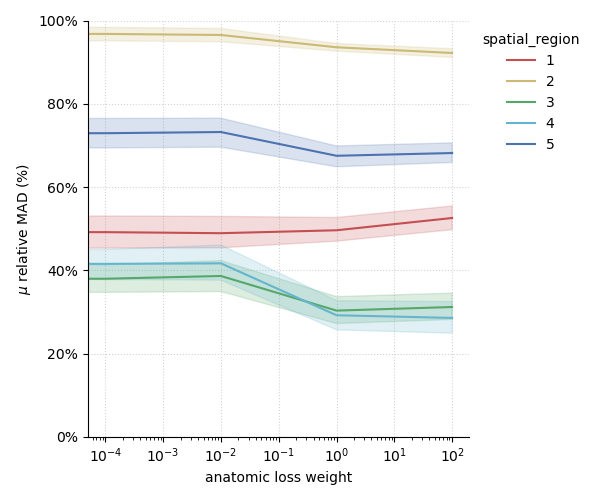

In [77]:
fig = ps.plot(
    mm[~mm.spatial_region.isin({'0', 'all'}) & mm.method.str.startswith('PINN')], 
    x='a_loss_weight',
    y='mu_pred_MAD_relative',
    hue='spatial_region',
    height=5,
    width=6,
    legend=True,
    tight=True,
    plot_func=sns.lineplot
)
fig.axes[0].set_ylabel('$\mu$ relative MAD (%)')
fig.axes[0].yaxis.set_major_formatter(pct_format)
fig.axes[0].set_ylim(0, 100)
fig.axes[0].set_xscale('log')
fig.tight_layout()

fig.axes[0].set_xlabel('anatomic loss weight')

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_anat_line_plot.{ext}', bbox_inches='tight', dpi=200)

In [78]:
%autoreload

blue, orange, green, red, purple, brown, pink, gray, yellow, cyan = sns.color_palette('tab10')

mre_pinn.visual.COLORS.update(
    red=red,
    yellow=yellow,
    green=green,
    cyan=cyan,
    blue=blue
)

Loading ../data/BIOQIC/phantom/100/wave.nc
Loading ../data/BIOQIC/phantom/100/mre.nc
Loading ../data/BIOQIC/phantom/100/mre_mask.nc
Loading ../data/BIOQIC/phantom/30/wave.nc
Loading ../data/BIOQIC/phantom/30/mre.nc
Loading ../data/BIOQIC/phantom/30/mre_mask.nc
Loading ../data/BIOQIC/phantom/40/wave.nc
Loading ../data/BIOQIC/phantom/40/mre.nc
Loading ../data/BIOQIC/phantom/40/mre_mask.nc
Loading ../data/BIOQIC/phantom/50/wave.nc
Loading ../data/BIOQIC/phantom/50/mre.nc
Loading ../data/BIOQIC/phantom/50/mre_mask.nc
Loading ../data/BIOQIC/phantom/60/wave.nc
Loading ../data/BIOQIC/phantom/60/mre.nc
Loading ../data/BIOQIC/phantom/60/mre_mask.nc
Loading ../data/BIOQIC/phantom/70/wave.nc
Loading ../data/BIOQIC/phantom/70/mre.nc
Loading ../data/BIOQIC/phantom/70/mre_mask.nc
Loading ../data/BIOQIC/phantom/80/wave.nc
Loading ../data/BIOQIC/phantom/80/mre.nc
Loading ../data/BIOQIC/phantom/80/mre_mask.nc
Loading ../data/BIOQIC/phantom/90/wave.nc
Loading ../data/BIOQIC/phantom/90/mre.nc
Loading ../

<IPython.core.display.Javascript object>


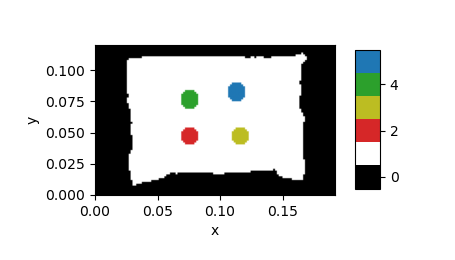

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

  plt.gcf().tight_layout()



<IPython.core.display.Javascript object>


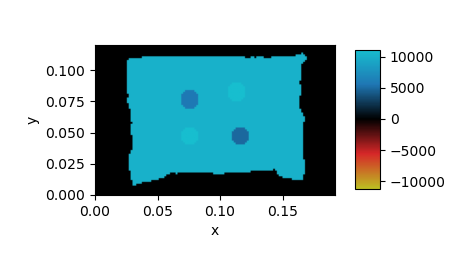

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

  plt.gcf().tight_layout()



In [79]:
dataset = mre_pinn.data.MREDataset.load_xarrays(
    xarray_dir='../data/BIOQIC/phantom'
)
dataset[0].view('mre_mask', ax_height=1.5, space=0.2)
plt.gcf().tight_layout()
plt.savefig('images/phantom_regions.png', dpi=200, bbox_inches='tight')
dataset[0].view('mre', ax_height=1.5, space=0.2)
plt.gcf().tight_layout()
plt.savefig('images/phantom_mre.png', dpi=200, bbox_inches='tight')

<IPython.core.display.Javascript object>


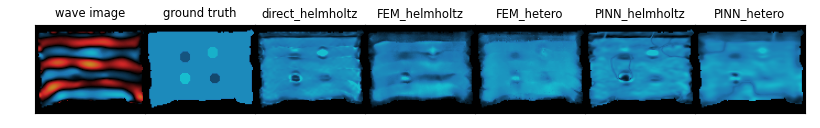

Loading ../data/BIOQIC/phantom/100/wave.nc
Loading ../data/BIOQIC/phantom/100/mre.nc
Loading ../data/BIOQIC/phantom/100/mre_mask.nc
Loading 2023-2-26_phantom_FEM/train_phantom_100_0_helmholtz/train_phantom_100_0_helmholtz_direct.nc
Loading 2023-2-26_phantom_FEM/train_phantom_100_0_helmholtz/train_phantom_100_0_helmholtz_fem.nc
Loading 2023-2-26_phantom_FEM/train_phantom_100_0_hetero/train_phantom_100_0_hetero_fem.nc
Loading 2022-2-7_phantom_anat2/train_phantom_100_60_helmholtz_1e-04/train_phantom_100_60_helmholtz_1e-04_elastogram.nc
Loading 2022-2-7_phantom_anat2/train_phantom_100_60_hetero_1e-04/train_phantom_100_60_hetero_1e-04_elastogram.nc


In [207]:
%autoreload
import mre_pinn

# wave images

image_names = [
    'wave image', 'ground truth', 'direct_helmholtz', 'FEM_helmholtz', 'FEM_hetero', 'PINN_helmholtz', 'PINN_hetero'
]

pinn_expt_name = '2022-2-7_phantom_anat2'
pinn_job_name = 'train_phantom_{example_id}_{omega}_{pde_name}_{a_loss_weight:.0e}'

fem_expt_name = '2023-2-26_phantom_FEM'
fem_job_name = 'train_phantom_{example_id}_{savgol_filter}_{pde_name}'

def plot_image_grid(example_ids):
    n_rows = len(example_ids)
    n_cols = len(image_names)
    ax_width = 1.1
    ax_height = ax_width * 80 / 100
    
    omega = 60
    a_loss_weight = 1e-4
    savgol_filter = 0

    fig, axes, cbar_ax = mre_pinn.visual.subplot_grid(
        n_rows, n_cols, ax_height, ax_width, space=0, pad=(0.35,0.15,0.15,0.25)
    )
    for row_idx, example_id in enumerate(example_ids):
        example = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/phantom', example_id)
        for col_idx, image_name in enumerate(image_names):
            ax = axes[row_idx,col_idx]
            #ax.text(0.1, 0.1, f'{row_idx}, {col_idx}')
            if col_idx == 0 and False:
                ax.set_ylabel(example_id + ' Hz', fontsize='medium')
            if row_idx == 0:
                ax.set_title(image_name, fontsize='small')
            ax.set_yticks([])
            ax.set_xticks([])

            if image_name == 'wave image':
                array = example.wave.sel(component='z')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = array.real * (example.mre_mask.values[...,0] > 0)

            elif image_name == 'ground truth':
                array = example.mre[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'direct_helmholtz':
                job_name = fem_job_name.format(
                    example_id=example_id, pde_name='helmholtz', savgol_filter=savgol_filter
                )
                nc_file = f'{fem_expt_name}/{job_name}/{job_name}_direct.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='direct_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)
                
            elif image_name == 'FEM_helmholtz':
                job_name = fem_job_name.format(
                    example_id=example_id, pde_name='helmholtz', savgol_filter=savgol_filter
                )
                nc_file = f'{fem_expt_name}/{job_name}/{job_name}_fem.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'FEM_hetero':
                job_name = fem_job_name.format(
                    example_id=example_id, pde_name='hetero', savgol_filter=savgol_filter
                )
                nc_file = f'{fem_expt_name}/{job_name}/{job_name}_fem.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'PINN_helmholtz':
                job_name = pinn_job_name.format(
                    example_id=example_id, pde_name='helmholtz', omega=omega, a_loss_weight=a_loss_weight
                )
                nc_file = f'{pinn_expt_name}/{job_name}/{job_name}_elastogram.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'PINN_hetero':
                job_name = pinn_job_name.format(
                    example_id=example_id, pde_name='hetero', omega=omega, a_loss_weight=a_loss_weight
                )
                nc_file = f'{pinn_expt_name}/{job_name}/{job_name}_elastogram.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            mre_pinn.visual.imshow(ax, array[14:-14], **color_kws)
    return fig

fig = plot_image_grid(['30', '40', '50', '60', '70', '80', '90', '100'][-1:])
#fig0 = plot_image_grid(['30', '40', '50', '60'])
#fig1 = plot_image_grid(['70', '80', '90', '100'])

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_wave_grid.{ext}', bbox_inches='tight', dpi=200)
    #fig0.savefig(f'images/phantom_wave_grid0.{ext}', bbox_inches='tight', dpi=200)
    #fig1.savefig(f'images/phantom_wave_grid1.{ext}', bbox_inches='tight', dpi=200)

In [ ]:
%autoreload
import mre_pinn

image_names = ['wave image', 'ground truth', 'direct_helmholtz', 'FEM_helmholtz', 'FEM_hetero', 'PINN_helmholtz', 'PINN_hetero']

def plot_image_grid(example_ids):
    n_rows = len(example_ids)
    n_cols = len(image_names)
    ax_width = 1.1
    ax_height = ax_width * 80 / 100
    
    data_name = 'phantom'
    omega = 30

    fig, axes, cbar_ax = mre_pinn.visual.subplot_grid(n_rows, n_cols, ax_height, ax_width, space=0, pad=(0.35,0.15,0.15,0.25))
    for row_idx, example_id in enumerate(example_ids):
        example = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/phantom', example_id)
        for col_idx, image_name in enumerate(image_names):
            ax = axes[row_idx,col_idx]
            #ax.text(0.1, 0.1, f'{row_idx}, {col_idx}')
            if col_idx == 0:
                ax.set_ylabel(example_id, fontsize='medium')
            if row_idx == 0:
                ax.set_title(image_name, fontsize='small')
            ax.set_yticks([])
            ax.set_xticks([])

            if image_name == 'wave image':
                array = example.wave.sel(component='z')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = array.real * (example.mre_mask.values[...,0] > 0)

            elif image_name == 'ground truth':
                array = example.mre[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'direct_helmholtz':
                job_name = name.format(
                    data_name=data_name, example_id=example_id, pde_name='helmholtz', omega=omega
                )
                nc_file = f'{expt_name}/{job_name}/{job_name}_direct.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='direct_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)
                
            elif image_name == 'FEM_helmholtz':
                job_name = name.format(
                    data_name=data_name, example_id=example_id, pde_name='helmholtz', omega=omega
                )
                nc_file = f'{expt_name}/{job_name}/{job_name}_fem.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'FEM_hetero':
                job_name = name.format(
                    data_name=data_name, example_id=example_id, pde_name='hetero', omega=omega
                )
                nc_file = f'{expt_name}/{job_name}/{job_name}_fem.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'PINN_helmholtz':
                job_name = name.format(
                    data_name=data_name, example_id=example_id, pde_name='helmholtz', omega=omega
                )
                nc_file = f'{expt_name}/{job_name}/{job_name}_elastogram.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'PINN_hetero':
                job_name = name.format(
                    data_name=data_name, example_id=example_id, pde_name='hetero', omega=omega
                )
                nc_file = f'{expt_name}/{job_name}/{job_name}_elastogram.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            mre_pinn.visual.imshow(ax, array[14:-14], **color_kws)
    return fig

fig = plot_image_grid(['30', '40', '50', '60', '70', '80', '90', '100'])
#fig0 = plot_image_grid(['30', '40', '50', '60'])
#fig1 = plot_image_grid(['70', '80', '90', '100'])

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_example_grid.{ext}', bbox_inches='tight', dpi=200)
    #fig0.savefig(f'images/phantom_example_grid0.{ext}', bbox_inches='tight', dpi=200)
    #fig1.savefig(f'images/phantom_example_grid1.{ext}', bbox_inches='tight', dpi=200)

In [ ]:
%autoreload
import mre_pinn

image_names = [
    'ground truth',
    'FEM_helmholtz',
    'FEM_hetero',
    'direct_helmholtz',
    'PINN_helmholtz',
    'PINN_hetero'
]

def plot_image_grid(example_ids, omegas):
    n_rows = len(omegas)
    n_cols = len(image_names)
    ax_width = 2
    ax_height = ax_width * 80 / 100
    
    data_name = 'phantom'

    fig, axes, cbar_ax = mre_pinn.visual.subplot_grid(n_rows, n_cols, ax_height, ax_width, space=0, pad=(0.35,0.15,0.15,0.25))

    for col_idx, image_name in enumerate(image_names):
        for row_idx, omega in enumerate(omegas):
            mean_array = 0
            for example_id in example_ids:
                example = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/phantom', example_id)
                ax = axes[row_idx,col_idx]
                #ax.text(0.1, 0.1, f'{row_idx}, {col_idx}')
                if col_idx == 0:
                    ax.set_ylabel(str(omega), fontsize='medium')
                if row_idx == 0:
                    ax.set_title(image_name, fontsize='small')
                ax.set_yticks([])
                ax.set_xticks([])

                if image_name == 'wave image':
                    array = example.wave.sel(component='z')[...,0]
                    color_kws = mre_pinn.visual.get_color_kws(array)
                    color_kws['vmin'] = -color_kws['vmax']
                    array = array.real * (example.mre_mask.values[...,0] > 0)

                elif image_name == 'ground truth':
                    array = example.mre[...,0]
                    color_kws = mre_pinn.visual.get_color_kws(array)
                    color_kws['vmin'] = -color_kws['vmax']
                    array = np.abs(array)

                elif image_name == 'direct_helmholtz':
                    job_name = name.format(
                        data_name=data_name, example_id=example_id, pde_name='helmholtz', omega=omega
                    )
                    nc_file = f'{expt_name}/{job_name}/{job_name}_direct.nc'
                    array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='direct_pred', z=0)
                    color_kws = mre_pinn.visual.get_color_kws(array)
                    color_kws['vmin'] = -color_kws['vmax']
                    array = np.abs(array)

                elif image_name == 'FEM_helmholtz':
                    job_name = name.format(
                        data_name=data_name, example_id=example_id, pde_name='helmholtz', omega=omega
                    )
                    nc_file = f'{expt_name}/{job_name}/{job_name}_fem.nc'
                    array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred', z=0)
                    color_kws = mre_pinn.visual.get_color_kws(array)
                    color_kws['vmin'] = -color_kws['vmax']
                    array = np.abs(array)

                elif image_name == 'FEM_hetero':
                    job_name = name.format(
                        data_name=data_name, example_id=example_id, pde_name='hetero', omega=omega
                    )
                    nc_file = f'{expt_name}/{job_name}/{job_name}_fem.nc'
                    array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred', z=0)
                    color_kws = mre_pinn.visual.get_color_kws(array)
                    color_kws['vmin'] = -color_kws['vmax']
                    array = np.abs(array)

                elif image_name == 'PINN_helmholtz':
                    job_name = name.format(
                        data_name=data_name, example_id=example_id, pde_name='helmholtz', omega=omega
                    )
                    nc_file = f'{expt_name}/{job_name}/{job_name}_elastogram.nc'
                    array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred', z=0)
                    color_kws = mre_pinn.visual.get_color_kws(array)
                    color_kws['vmin'] = -color_kws['vmax']
                    array = np.abs(array)

                elif image_name == 'PINN_hetero':
                    job_name = name.format(
                        data_name=data_name, example_id=example_id, pde_name='hetero', omega=omega
                    )
                    nc_file = f'{expt_name}/{job_name}/{job_name}_elastogram.nc'
                    array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred', z=0)
                    color_kws = mre_pinn.visual.get_color_kws(array)
                    color_kws['vmin'] = -color_kws['vmax']
                    array = np.abs(array)
                    
                mean_array += array / len(example_ids)

            #color_kws['vmax'] = 2e4
            #color_kws['vmin'] = -color_kws['vmax']
            mre_pinn.visual.imshow(ax, mean_array[14:-14], **color_kws)
    return fig

fig = plot_image_grid(['30', '40', '50', '60', '70', '80', '90', '100'], [30])
#fig0 = plot_image_grid(['30', '40', '50', '60'])
#fig1 = plot_image_grid(['70', '80', '90', '100'])

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_multifreq_grid.{ext}', bbox_inches='tight', dpi=200)
    #fig0.savefig(f'images/phantom_example_grid0.{ext}', bbox_inches='tight', dpi=200)
    #fig1.savefig(f'images/phantom_example_grid1.{ext}', bbox_inches='tight', dpi=200)